In [1]:
#!pip install seaborn
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Socialnetworkads.csv")

In [3]:
data.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


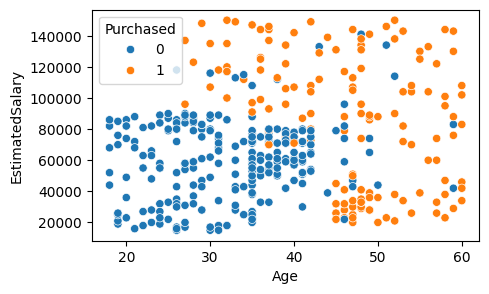

In [4]:
plt.figure(figsize=(5,3))
sns.scatterplot(x="Age", y="EstimatedSalary", data=data, hue="Purchased")
plt.show()

In [5]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [7]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [8]:
data.dtypes

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [9]:
X=data.iloc[:,:-1]
Y=data["Purchased"]

In [10]:
#Feature Scalling
from sklearn.preprocessing import StandardScaler

In [11]:
sc=StandardScaler()
sc.fit(X)
X=pd.DataFrame(sc.transform(X),columns=X.columns)

In [12]:
X

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [13]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=42)

# Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [21]:
dt.score(X_test,Y_test)*100

83.75

In [23]:
dt.score(X_train,Y_train)*100

99.6875

In [24]:
dt.predict([[19,19000]])

C:\Users\Utkarsha\Documents\ENV\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

C:\Users\Utkarsha\Documents\ENV\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


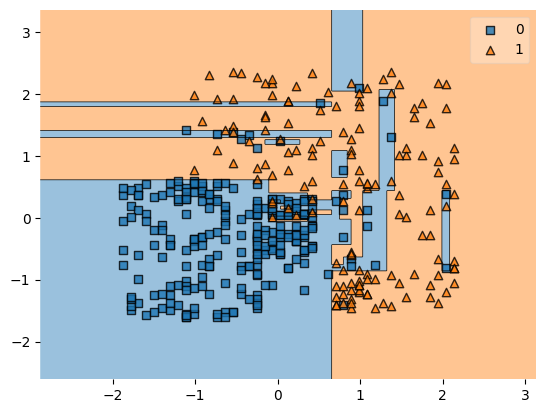

In [29]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.to_numpy(),Y.to_numpy(),clf=dt)
plt.show()

In [30]:
#!pip install mlxtend

In [31]:
#Graph
from sklearn.tree import plot_tree

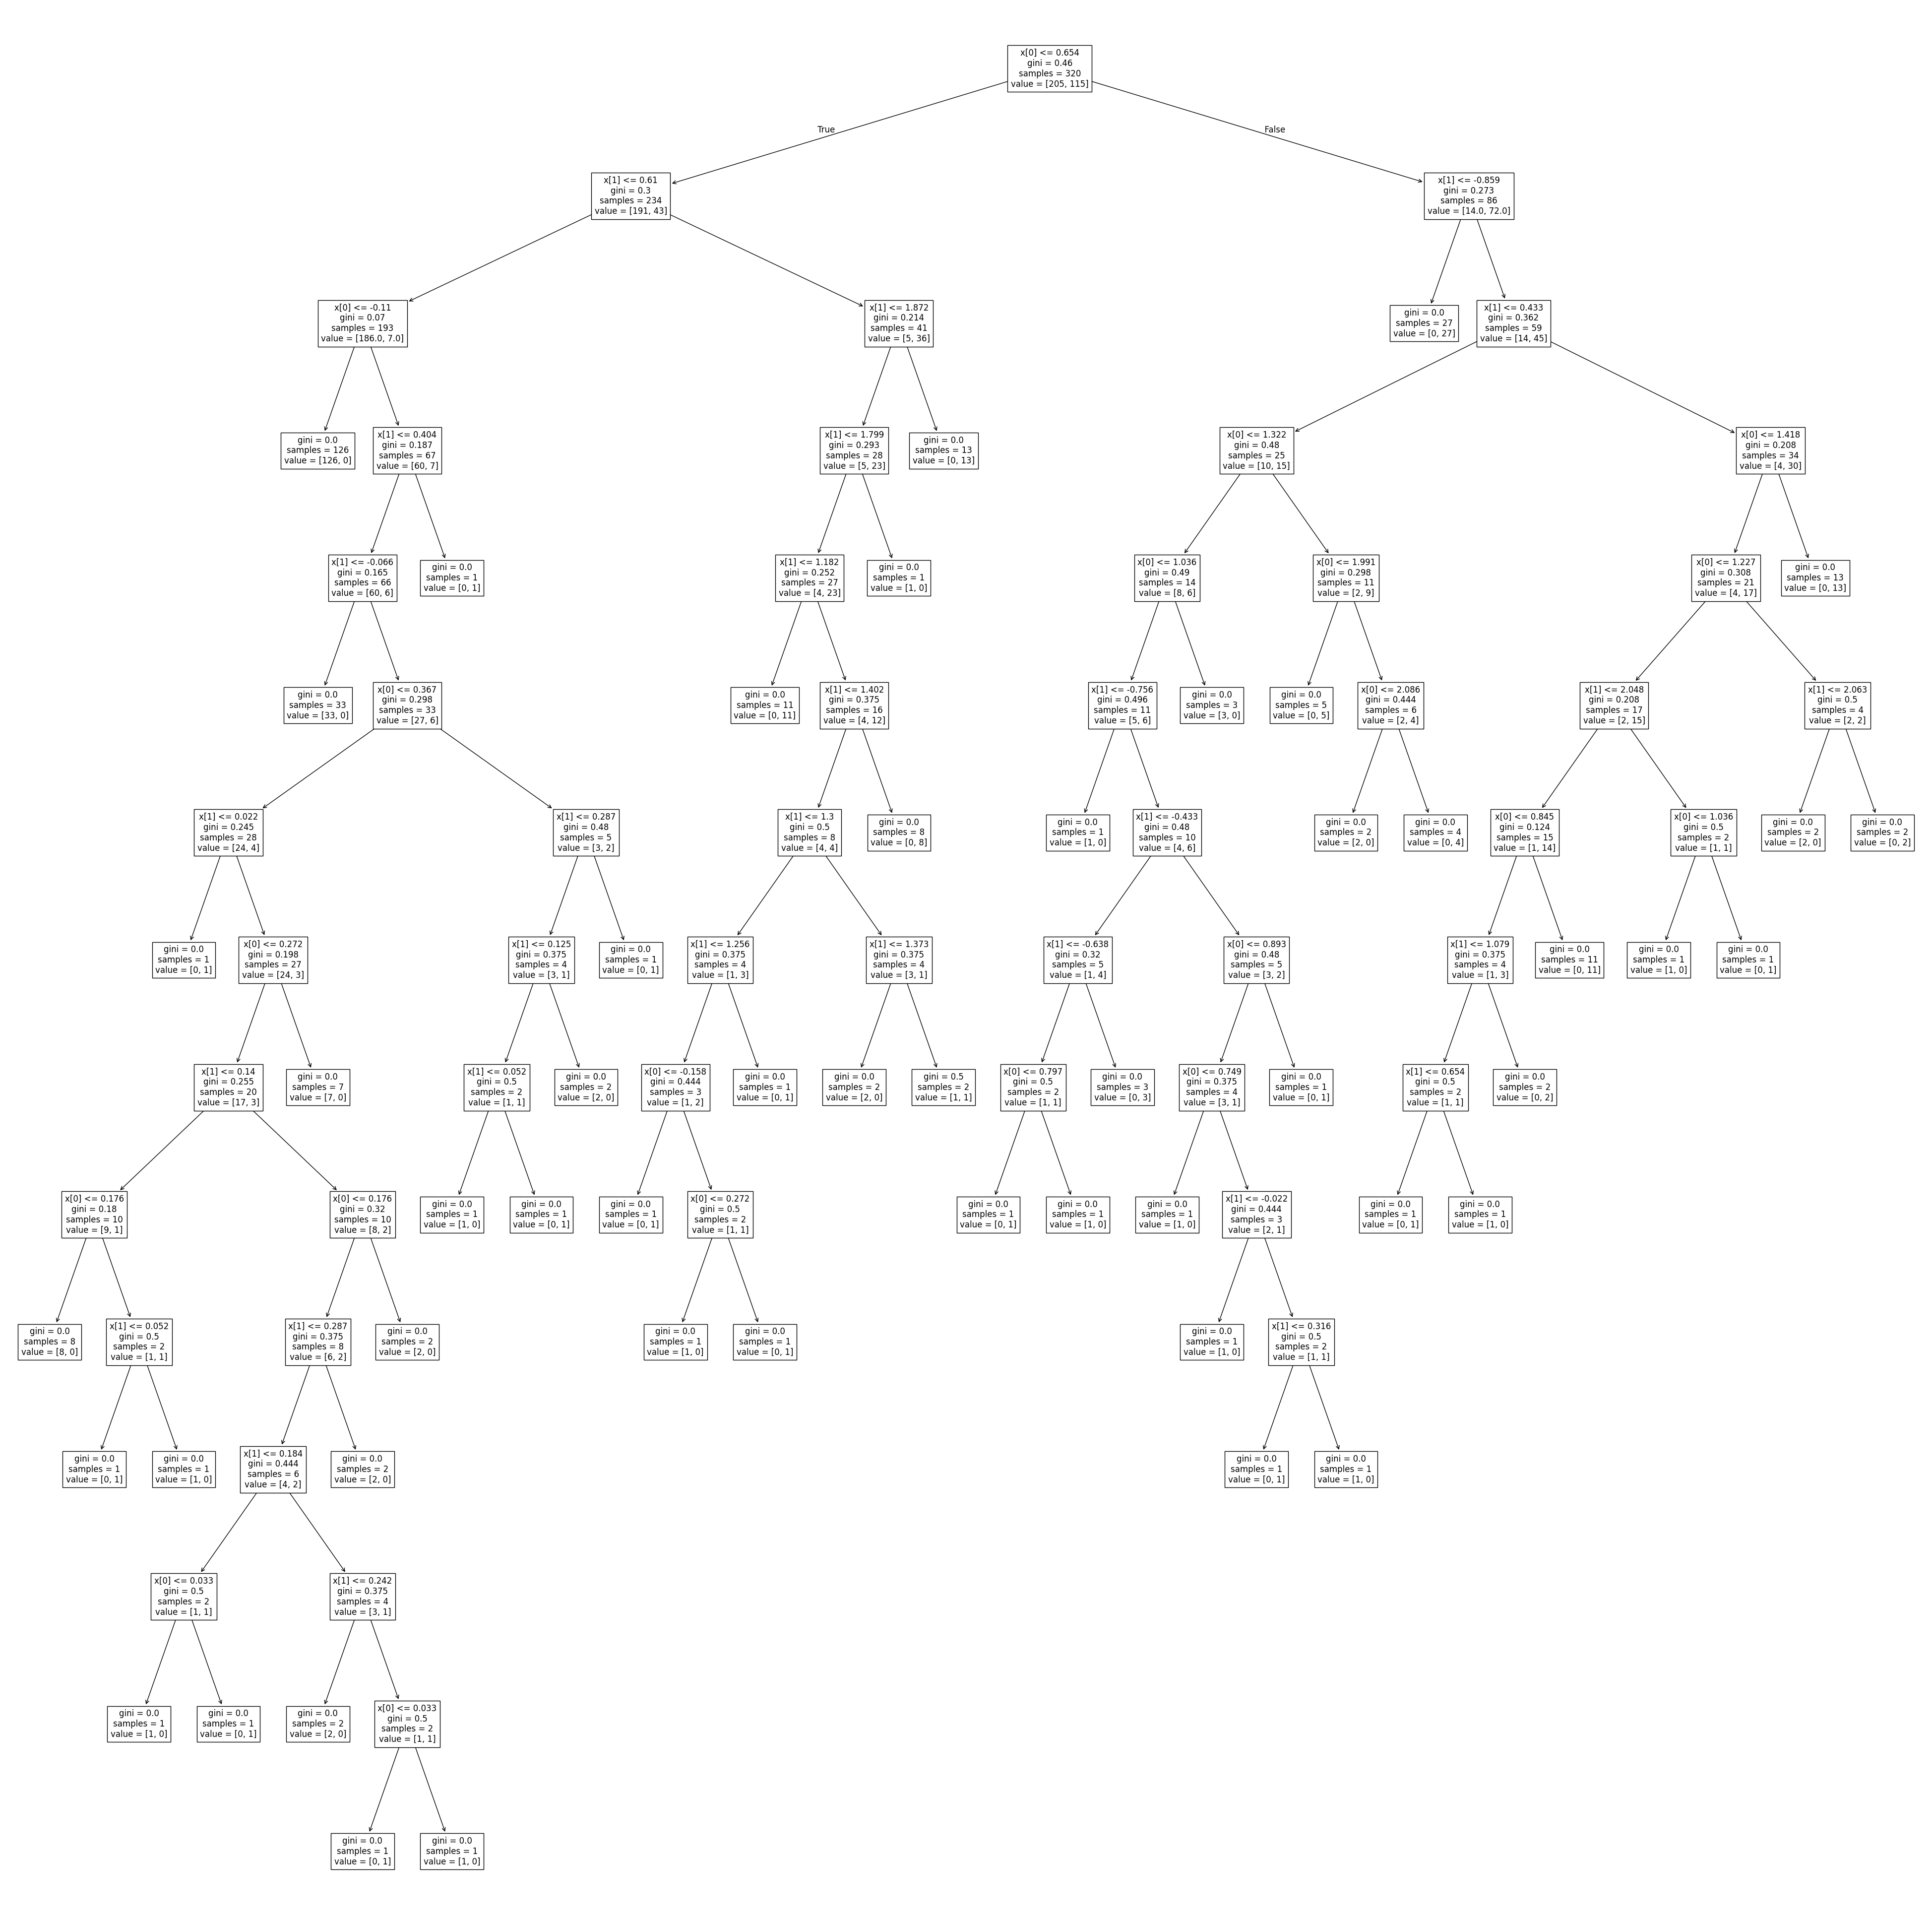

In [32]:
plt.figure(figsize=(50,50))
plot_tree(dt)
plt.show()

In [33]:
# check accuracy with ginni index
dt1=DecisionTreeClassifier(criterion='gini')
dt1.fit(X_train,Y_train)

DecisionTreeClassifier()

In [34]:
dt.score(X_test,Y_test)*100

83.75

C:\Users\Utkarsha\Documents\ENV\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


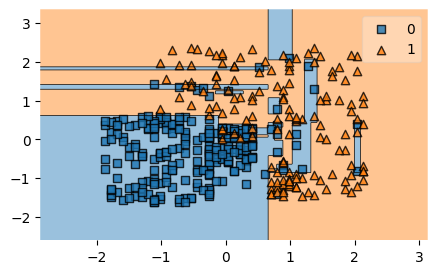

In [35]:
plt.figure(figsize=(5,3))
plot_decision_regions(X.to_numpy(),Y.to_numpy(),clf=dt)
plt.show()

In [36]:
dt2= DecisionTreeClassifier(criterion='entropy')
dt2.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [38]:
dt2.score(X_test,Y_test)*100

83.75

C:\Users\Utkarsha\Documents\ENV\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


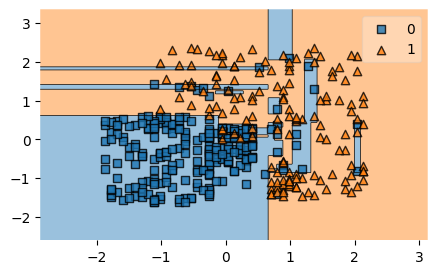

In [39]:
plt.figure(figsize=(5,3))
plot_decision_regions(X.to_numpy(),Y.to_numpy(),clf=dt)
plt.show()

In [40]:
dt2= DecisionTreeClassifier(criterion='entropy')
dt2.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [41]:
dt2.score(X_test,Y_test)*100

83.75

# Preuning

In [42]:
dt_pre= DecisionTreeClassifier(max_depth=5)
dt_pre.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5)

In [43]:
dt_pre.score(X_test, Y_test)*100

90.0

In [44]:
dt_pre.score(X_train, Y_train)*100

93.4375

C:\Users\Utkarsha\Documents\ENV\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


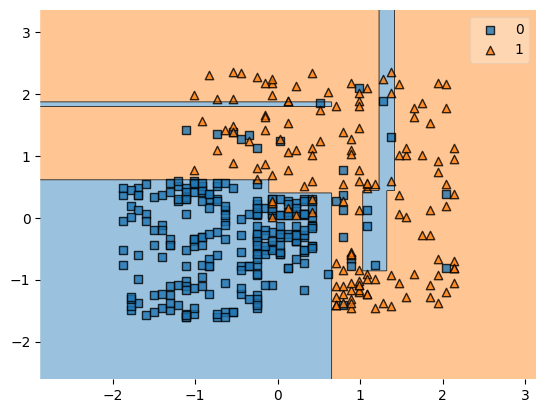

In [45]:
plot_decision_regions(X.to_numpy(),Y.to_numpy(),clf=dt_pre)
plt.show()

# Post- Preuning

In [46]:
for i in range(1,20):
    dt_pre1= DecisionTreeClassifier(max_depth=i)
    dt_pre1.fit(X_train,Y_train)
    print(dt_pre1.score(X_train, Y_train), dt_pre1.score(X_test, Y_test),i)
# We choose that depth no which is difference is low 2 and 3

0.821875 0.9 1
0.91875 0.9125 2
0.91875 0.9125 3
0.93125 0.9125 4
0.934375 0.9 5
0.95 0.8625 6
0.96875 0.85 7
0.975 0.85 8
0.98125 0.85 9
0.984375 0.85 10
0.990625 0.8375 11
0.990625 0.8375 12
0.996875 0.8375 13
0.996875 0.8375 14
0.996875 0.8375 15
0.996875 0.8375 16
0.996875 0.8375 17
0.996875 0.8375 18
0.996875 0.8375 19


In [47]:
dt_pre2= DecisionTreeClassifier(max_depth=3)
dt_pre2.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [48]:
dt_pre2.score(X_test, Y_test)*100

91.25

In [49]:
dt_pre2.score(X_train, Y_train)*100

91.875

C:\Users\Utkarsha\Documents\ENV\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


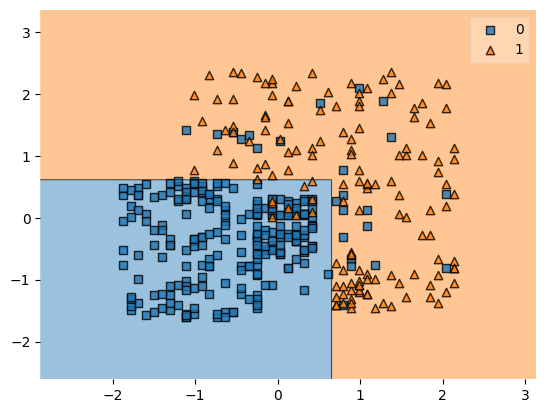

In [50]:
plot_decision_regions(X.to_numpy(),Y.to_numpy(),clf=dt_pre2)
plt.show()

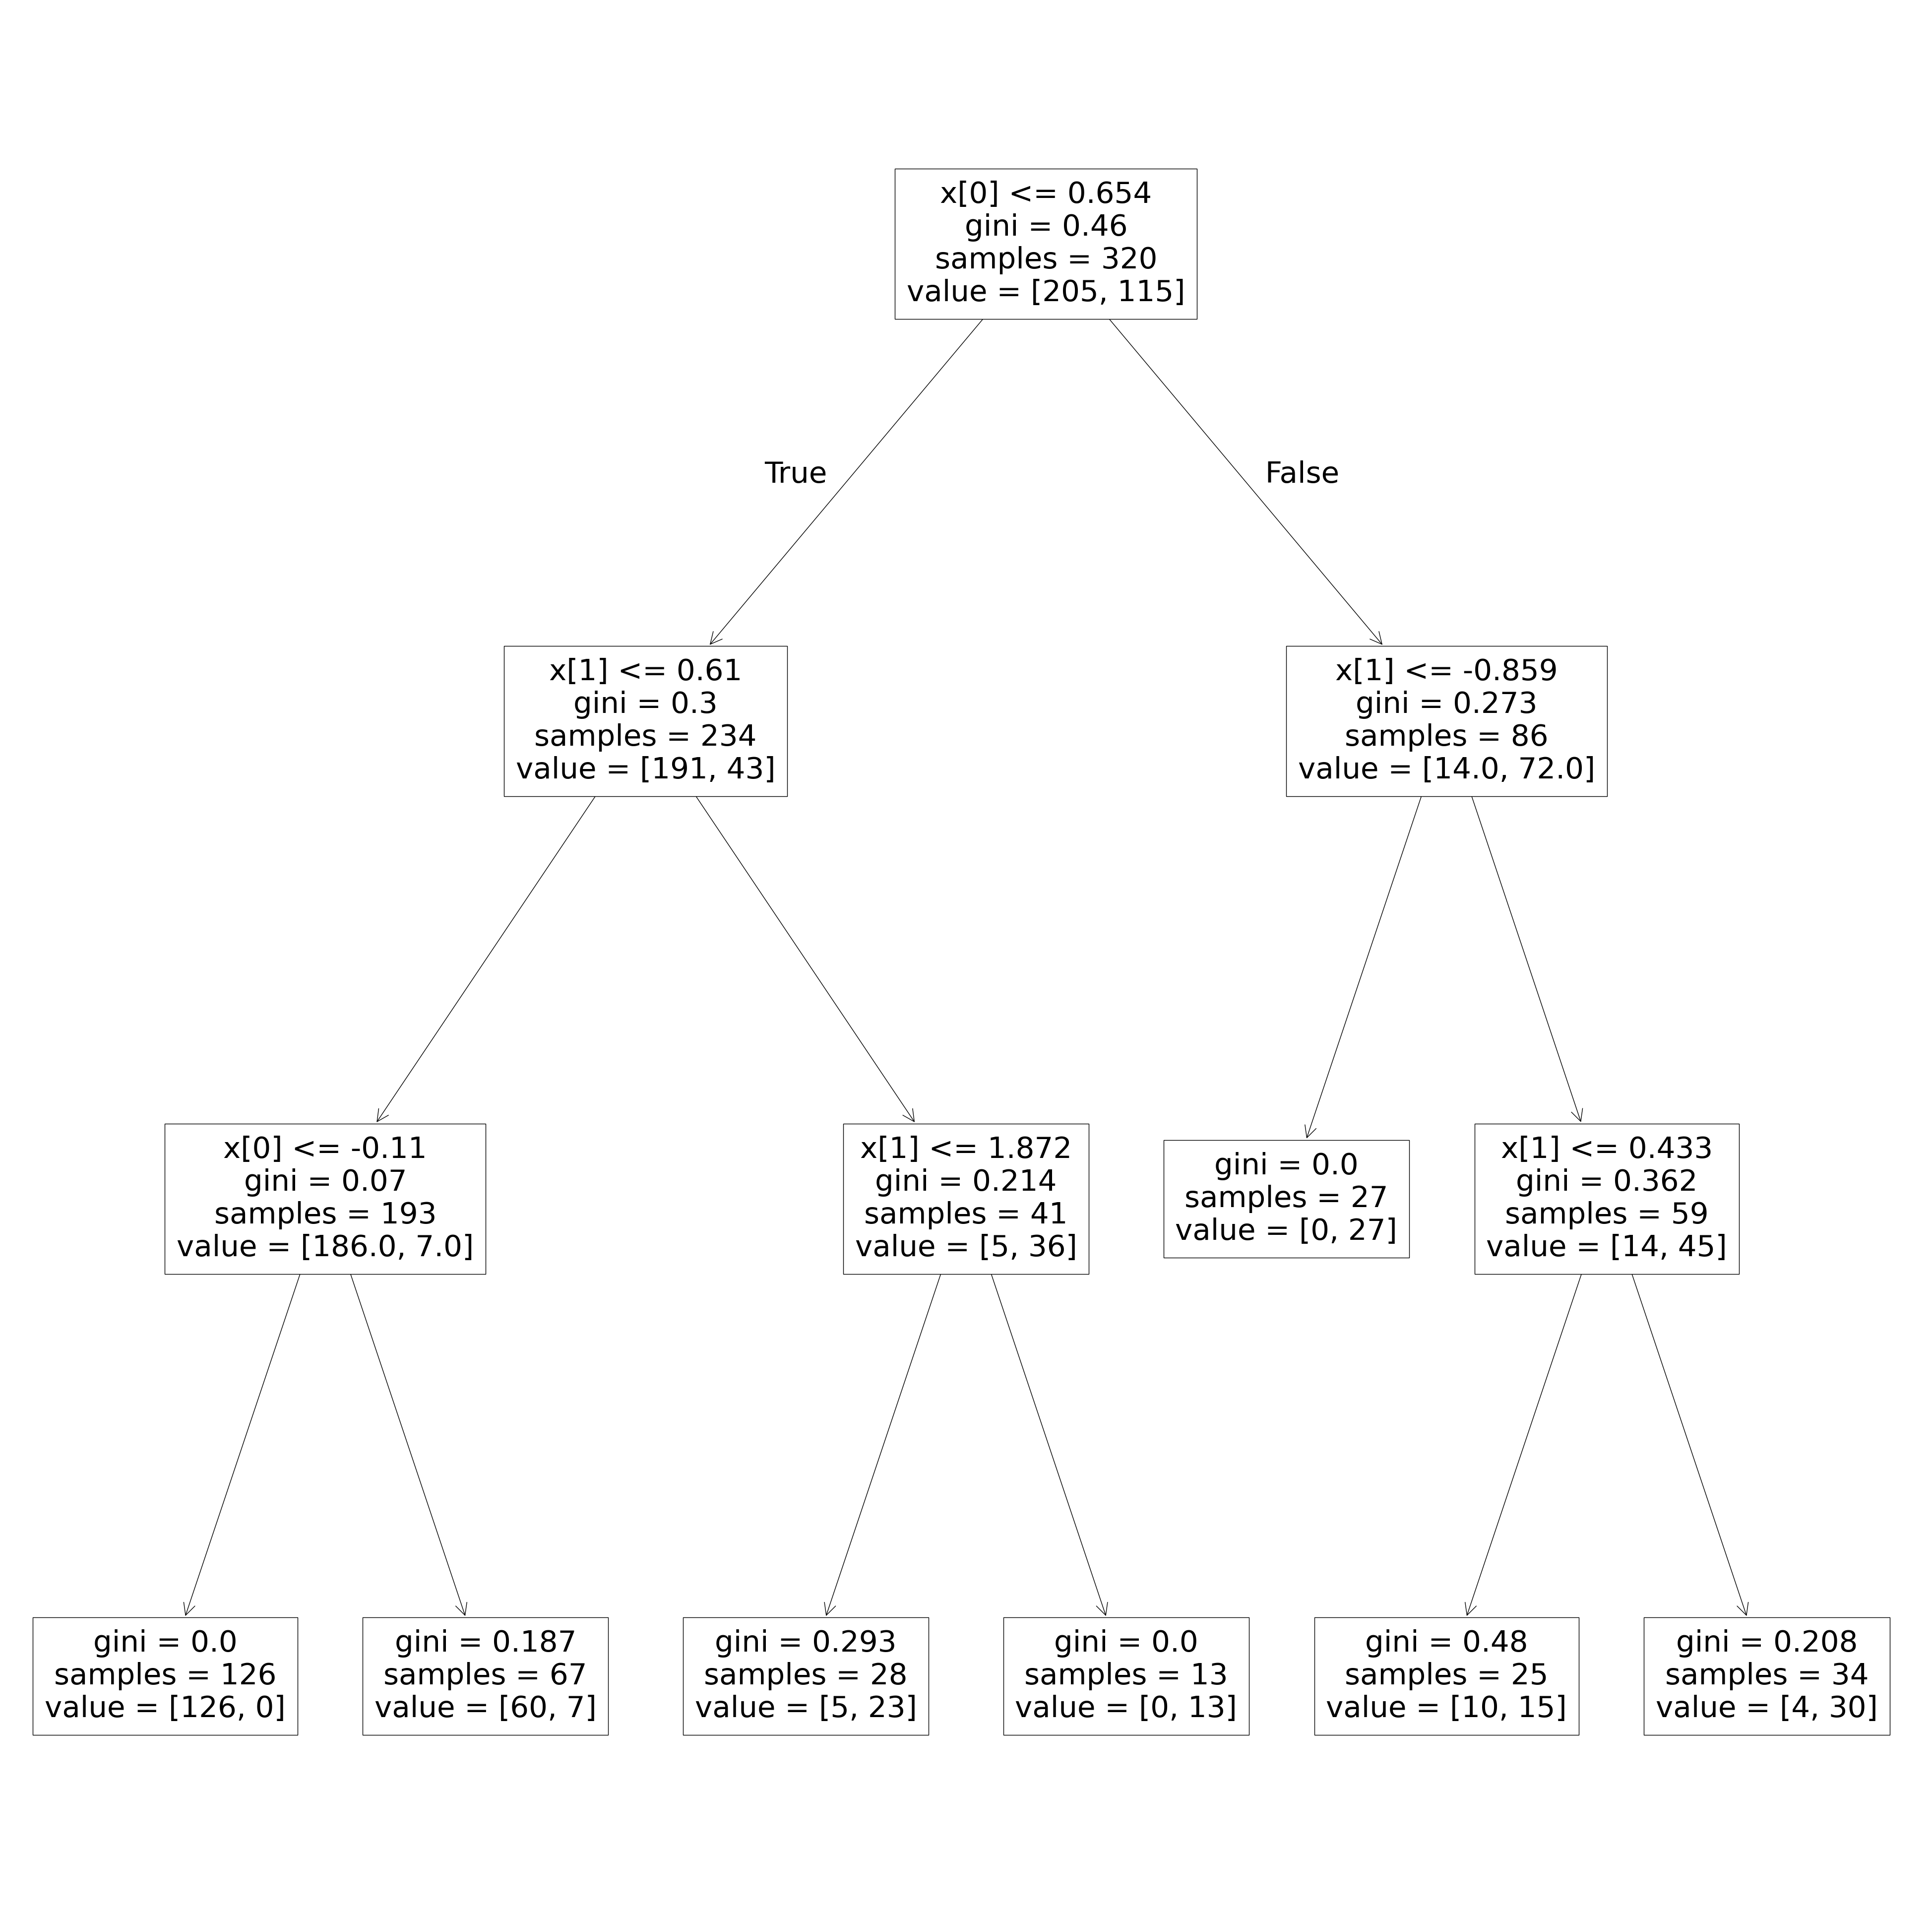

In [51]:
plt.figure(figsize=(50,50))
plot_tree(dt_pre2)
#plt.savefig("DT.jpg")
plt.show()

### We are apllying KNN 

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [66]:
knn.score(X_test,Y_test)*100

91.25

In [67]:
knn.score(X_train,Y_train)*100

92.5

In [68]:
# we want right value ... this look for finding a better accuracy between 1 to 30 neighbours
for i in range(1,20):
    knn1=KNeighborsClassifier(n_neighbors=i)
    knn1.fit(X_train,Y_train)
    print(i, knn1.score(X_test,Y_test)*100, knn1.score(X_train,Y_train)*100)

1 85.0 99.6875
2 86.25 91.5625
3 91.25 92.5
4 92.5 91.875
5 92.5 90.9375
6 90.0 90.9375
7 93.75 91.875
8 92.5 90.625
9 93.75 91.25
10 92.5 90.625
11 92.5 90.9375
12 92.5 91.25
13 92.5 91.5625
14 92.5 90.625
15 92.5 90.625
16 92.5 90.0
17 92.5 90.625
18 92.5 90.0
19 92.5 90.9375


In [69]:
# n_neighbors =3 is the best accuracy for knn model 
# to check Decision Boundries

In [63]:
from mlxtend.plotting import plot_decision_regions

C:\Users\Utkarsha\Documents\ENV\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


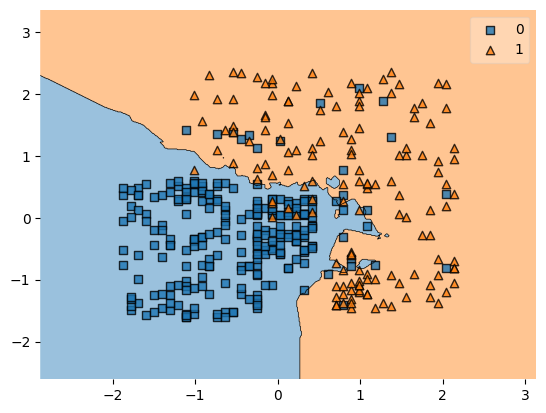

In [64]:
plot_decision_regions(X.to_numpy(),Y.to_numpy(),clf=knn)
plt.show()

# Logistics Regression 

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [72]:
lr.score(X_test,Y_test)*100

86.25

In [73]:
lr.score(X_train,Y_train)*100

84.0625

In [75]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
dt=DecisionTreeClassifier()

In [79]:
df={"criterion":["gini", "entropy", "log_loss"],
    "splitter":["best", "random"],
    "max_depth": [i for i in range(2,20)]}

In [80]:
3*2*18

108

In [83]:
gd=GridSearchCV(DecisionTreeClassifier(),param_grid=df)
gd.fit(X_train,Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'splitter': ['best', 'random']})

In [84]:
gd.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}

In [87]:
gd.best_score_

np.float64(0.903125)

In [91]:
dt_p=DecisionTreeClassifier(criterion= 'entropy', max_depth= 4, splitter= 'best')
dt_p.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [92]:
dt_p.score(X_train,Y_train)*100, dt_p.score(X_test,Y_test)*100

(91.875, 91.25)